In [1]:
import json
import cv2
from PIL import Image
from matplotlib import pyplot
import os
from tqdm import tqdm

In [2]:
image_name = "00048_00"

img_pose = cv2.imread(f"../../data/train/openpose_img/{image_name}_rendered.png")[:,:,::-1]
with open(f"../../data/train/openpose_json/{image_name}_keypoints.json", "r") as f:
    img_pose_json = json.load(f)

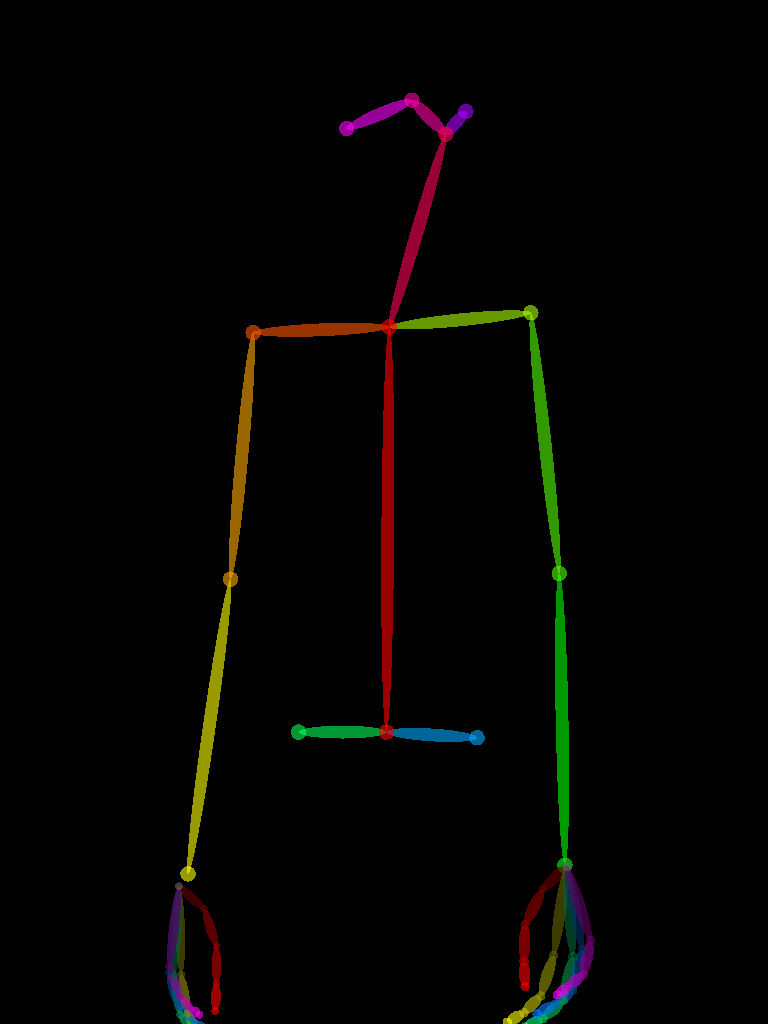

In [3]:
Image.fromarray(img_pose)

In [4]:
x_coordinates = []
y_coordinates = []
alpha = []

for i in range(0, len(img_pose_json["people"][0]["pose_keypoints_2d"]), 3):
    x_coordinates.append(img_pose_json["people"][0]["pose_keypoints_2d"][i])

for i in range(1, len(img_pose_json["people"][0]["pose_keypoints_2d"]), 3):
    y_coordinates.append(img_pose_json["people"][0]["pose_keypoints_2d"][i])

for i in range(2, len(img_pose_json["people"][0]["pose_keypoints_2d"]), 3):
    alpha.append(img_pose_json["people"][0]["pose_keypoints_2d"][i])

In [5]:
x_coordinates

[445.352,
 388.751,
 252.647,
 230.015,
 187.548,
 530.341,
 558.722,
 564.416,
 385.852,
 298.015,
 0,
 0,
 476.585,
 0,
 0,
 411.391,
 465.362,
 346.139,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [6]:
y_coordinates

[133.657,
 326.465,
 332.159,
 578.642,
 873.34,
 312.281,
 572.961,
 864.744,
 731.601,
 731.61,
 0,
 0,
 737.257,
 0,
 0,
 99.6869,
 111.044,
 128.095,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [7]:
img_pose.shape

(1024, 768, 3)

## Data Verification

In [12]:
folder_path = "../../data/train/openpose_json/"
json_directory = os.listdir(folder_path)
files_path = [os.path.join(folder_path, i) for i in json_directory]

In [13]:
set([bool(i.split(".")[-1]=="json") for i in files_path])

{True}

In [14]:
def load_json(json_file_path):
    with open(json_file_path, "r") as f:
        img_pose_json = json.load(f)
    return img_pose_json

In [15]:
# similarly created train data, write it into the function if you want!
# it removes the files with more than 1 pose, since all images in the dataset contains just one person.

for file_path in tqdm(files_path):
    dct = load_json(file_path)
    assert "people" in dct
    if len(dct["people"])!=1:
        print(file_path)
    else:
        with open("../../data/train_data.txt", "a") as f:
            f.write(file_path.split("/")[-1][:8]+"\n")
    assert "pose_keypoints_2d" in dct["people"][0]
    assert len(dct["people"][0]["pose_keypoints_2d"])==75

 15%|█▍        | 1692/11647 [00:02<00:20, 485.76it/s] 

../../data/train/openpose_json/13345_00_keypoints.json


 25%|██▌       | 2941/11647 [00:03<00:08, 997.63it/s] 

../../data/train/openpose_json/03566_00_keypoints.json
../../data/train/openpose_json/14578_00_keypoints.json


 37%|███▋      | 4269/11647 [00:05<00:10, 728.15it/s] 

../../data/train/openpose_json/14650_00_keypoints.json


 38%|███▊      | 4432/11647 [00:05<00:10, 685.81it/s]

../../data/train/openpose_json/14381_00_keypoints.json


 47%|████▋     | 5469/11647 [00:07<00:10, 571.55it/s]

../../data/train/openpose_json/10961_00_keypoints.json


 51%|█████     | 5882/11647 [00:07<00:09, 622.53it/s]

../../data/train/openpose_json/08318_00_keypoints.json


 58%|█████▊    | 6698/11647 [00:08<00:04, 991.97it/s]

../../data/train/openpose_json/14541_00_keypoints.json


 63%|██████▎   | 7334/11647 [00:09<00:04, 1016.07it/s]

../../data/train/openpose_json/03588_00_keypoints.json


 66%|██████▋   | 7737/11647 [00:09<00:04, 919.05it/s] 

../../data/train/openpose_json/13954_00_keypoints.json
../../data/train/openpose_json/04057_00_keypoints.json


 69%|██████▉   | 8062/11647 [00:10<00:03, 1006.31it/s]

../../data/train/openpose_json/06089_00_keypoints.json


 80%|███████▉  | 9306/11647 [00:11<00:02, 901.68it/s] 

../../data/train/openpose_json/05687_00_keypoints.json


 86%|████████▋ | 10049/11647 [00:12<00:02, 754.42it/s]

../../data/train/openpose_json/08908_00_keypoints.json


100%|██████████| 11647/11647 [00:16<00:00, 705.07it/s]


## Final Data Prep

In [16]:
train_folder_path = "../../data/train/openpose_json/"

In [17]:
test_folder_path = "../../data/test/openpose_json/"

In [18]:
with open("../../data/train_data.txt", "r") as f:
    lst_train = f.read().split("\n")
with open("../../data/test_data.txt", "r") as f:
    lst_test = f.read().split("\n")

In [19]:
def create_data(lst_files, folder_path, save_path):
    files = os.listdir(folder_path)
    for file in lst_files:
        file_name = f"{file}_keypoints.json"
        file_path = os.path.join(folder_path, file_name)
        if file_name in files:
            dct = load_json(file_path)
            lst = dct["people"][0]["pose_keypoints_2d"]
            del lst[2::3]
            with open(os.path.join(save_path, file_name), "w") as f:
                json.dump(lst, f)

In [22]:
create_data(lst_test, test_folder_path, "../../data/Jp/test/")

In [23]:
create_data(lst_train, train_folder_path, "../../data/Jp/train/")